# Speed dating experiment

## What influences love at first sight? Or, at least, love in the first four minutes?

The [dataset](https://www.kaggle.com/annavictoria/speed-dating-experiment) was compiled by Columbia Business School professors Ray Fisman and Sheena Iyengar for their paper *Gender Differences in Mate Selection: Evidence From a Speed Dating Experiment*.

Data was gathered from participants in experimental speed dating events from 2002-2004. During the events, the attendees would have a four minute "first date" with every other participant of the opposite sex. At the end of their four minutes, participants were asked if they would like to see their date again. They were also asked to rate their date on six attributes: Attractiveness, Sincerity, Intelligence, Fun, Ambition, and Shared Interests.

## Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('SpeedDatingData.csv')

### Style

In [3]:
blue = '#1e1eff'
purple = '#7c7bfb'
salmon = '#ff9696'
red = '#ff5a5a'
pie_chart_colors = [red, blue]

In [4]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [5]:
# Hiding warnings for better appereance (this was added after checking all warnings)
import warnings
warnings.filterwarnings(action = "ignore")

## Data preprocessing
The original structure of data is a bit complicated and joins are needed if full data about a single date needed. So we decided to preprocess it so, that no joins will be needed. We achieved format which is easier to work with.

### Selecting and renaming attributes
Every row consists of data about both people attending the speed date. Partner's data is suffixed with *'_partners'*.

Partner's preffered attributes are suffixed with *'_pref'* and the person's own attributes are suffixed with *'_me'*.

#### Personal data
Personal data about the date participant and preffered partner's attribute.

In [6]:
personal_data = data[[
    'iid',
    'gender',
    'age',
    'wave',
    'field',
    'field_cd',
    'race',
    'samerace',
    'imprace',
    'imprelig',
    'from',
    'income',
    'goal',
    'date',
    'go_out',
    'career',
    'career_c',
    'sports',
    'tvsports',
    'exercise',
    'dining',
    'museums',
    'art',
    'hiking',
    'gaming',
    'clubbing',
    'reading',
    'tv',
    'theater',
    'movies',
    'concerts',
    'music',
    'shopping',
    'yoga',
    'attr1_1','sinc1_1','intel1_1','fun1_1','amb1_1','shar1_1',
    'attr3_1','sinc3_1','intel3_1','fun3_1','amb3_1',
    'you_call','them_cal',
    'date_3'
]]

personal_data.drop_duplicates(inplace=True)
personal_data = personal_data.rename(columns=
    {'attr1_1':'attr_pref',
     'sinc1_1':'sinc_pref',
     'intel1_1':'intel_pref',
     'fun1_1':'fun_pref',
     'amb1_1':'amb_pref',
     'shar1_1':'shar_pref',
     'attr3_1':'attr_me',
     'sinc3_1':'sinc_me',
     'intel3_1':'intel_me',
     'fun3_1':'fun_me',
     'amb3_1':'amb_me' 
    }
)

#### Dating data
Information about the date.

In [7]:
dating_data = data[[
    'iid','id','pid',
    'match',
    'int_corr',
    'dec_o',
    'dec',
    'like'    
]]

dating_data.drop_duplicates(inplace=True)
dating_data = dating_data.rename(columns=
    {
        'dec_o':'dec_partner',
        'like':'iid_like_pid'
    }
)

In [8]:
df = dating_data.merge(personal_data, how='left', on='iid')
df = df.merge(personal_data, how='left', left_on='pid', right_on='iid', suffixes=['','_partners']) 

In [9]:
df.to_csv("dataset.csv")

In [10]:
df

,iid,id,pid,match,int_corr,dec_partner,dec,iid_like_pid,gender,age,...,amb_pref_partners,shar_pref_partners,attr_me_partners,sinc_me_partners,intel_me_partners,fun_me_partners,amb_me_partners,you_call_partners,them_cal_partners,date_3_partners
0,1,1.0,11.0,0,0.14,0,1,7.0,0,21.0,...,0.0,5.0,8.0,9.0,8.0,7.0,5.0,0.0,0.0,0.0
1,1,1.0,11.0,0,0.14,0,1,7.0,0,21.0,...,0.0,5.0,8.0,9.0,8.0,7.0,5.0,0.0,0.0,0.0
2,1,1.0,11.0,0,0.14,0,1,7.0,0,21.0,...,0.0,5.0,8.0,9.0,8.0,7.0,5.0,0.0,0.0,0.0
3,1,1.0,11.0,0,0.14,0,1,7.0,0,21.0,...,0.0,5.0,8.0,9.0,8.0,7.0,5.0,0.0,0.0,0.0
4,1,1.0,12.0,0,0.54,0,1,7.0,0,21.0,...,0.0,0.0,9.0,9.0,10.0,9.0,9.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31149,552,22.0,529.0,0,0.62,1,0,5.0,1,25.0,...,10.0,20.0,6.0,10.0,7.0,9.0,5.0,0.0,0.0,0.0
31150,552,NaN,530.0,0,0.01,1,0,4.0,1,25.0,...,5.0,30.0,3.0,9.0,9.0,9.0,7.0,0.0,0.0,0.0
31151,552,NaN,530.0,0,0.01,1,0,4.0,1,25.0,...,5.0,30.0,3.0,9.0,9.0,9.0,7.0,0.0,0.0,0.0
31152,552,NaN,530.0,0,0.01,1,0,4.0,1,25.0,...,5.0,30.0,3.0,9.0,9.0,9.0,7.0,0.0,0.0,0.0


## EDA

In [11]:
print(f'Number of records in dataset: {len(df)}')

Number of records in dataset: 31154


In [12]:
participants_count = df['iid'].nunique()
print(f'Number of participants in speed dating experiment: { participants_count }')

Number of participants in speed dating experiment: 551


In [13]:
matches_count = df['match'].sum()
print(f'Number of matches in speed dating experiment: { matches_count }, which is { round(matches_count / len(df)*100, 2) }%')

Number of matches in speed dating experiment: 5060, which is 16.24%


### Participants' gender ratio

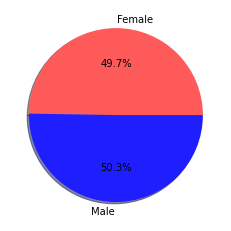

In [14]:
unique_participants_df = df.drop_duplicates(subset=['iid'])

gender = [len(unique_participants_df[unique_participants_df['gender'] == 0]), len(unique_participants_df[unique_participants_df['gender'] == 1])]
plt.pie(gender, labels = ['Female', 'Male'], shadow = True, autopct='%1.1f%%', colors = pie_chart_colors)
plt.show() 

### Matches ratio

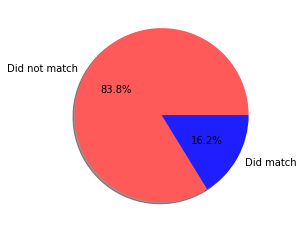

In [15]:
matches = [len(df[df['match'] == 0]), len(df[df['match'] == 1])]
plt.pie(matches, labels = ['Did not match', 'Did match'], shadow = True, autopct='%1.1f%%', colors = pie_chart_colors)
plt.show() 

### Participants' age

In [16]:
min(df['age'])

18.0

In [17]:
max(df['age'])

55.0

array([[<AxesSubplot:title={'center':'age'}>]], dtype=object)

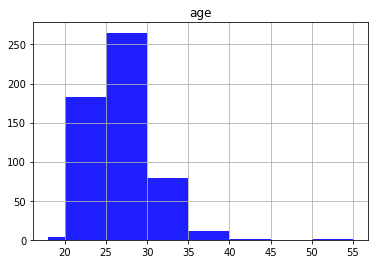

In [18]:
age_df = df[['iid', 'age']].drop_duplicates()

age_df.drop(columns = ['iid']).hist(bins=[18, 20, 25, 30, 35, 40, 45, 50, 55], figsize = (6, 4), color = blue)

#### Difference in matched participants' age

In [19]:
matched_df = df[df['match'] == 1]

matched_df['age_diff'] = abs(matched_df['age'] - matched_df['age_partners'])

array([[<AxesSubplot:title={'center':'age_diff'}>]], dtype=object)

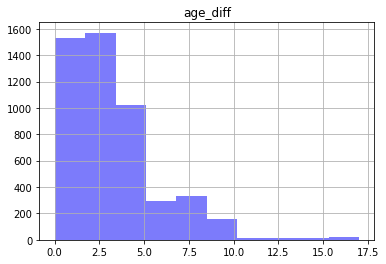

In [20]:
matched_df[[
    'age_diff'
]].hist(figsize = (6, 4), color = purple)

### Matched participants' race

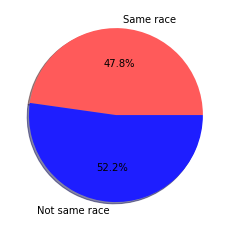

In [21]:
same_race_match_count = len(matched_df[matched_df['samerace'] == 1])
not_same_race_match_count = len(matched_df[matched_df['samerace'] == 0])

race_match = [same_race_match_count, not_same_race_match_count]
plt.pie(race_match, labels = ['Same race', 'Not same race'], shadow = True, autopct='%1.1f%%', colors = pie_chart_colors)
plt.show() 

### Participants' career

In [22]:
# credits for plot: https://stackoverflow.com/questions/49199164/increasing-pie-chart-size-with-matplotlib-radius-parameter-appears-to-do-nothin

def advanced_pie_chart(data, labels, fig_size):
    fig1, ax1 = plt.subplots(figsize = fig_size)
    fig1.subplots_adjust(0.3, 0, 1, 1)

    theme = plt.get_cmap('bwr')
    ax1.set_prop_cycle("color", [theme(1. * i / len(data)) for i in range(len(data))])

    _, _ = ax1.pie(data, startangle=90)

    ax1.axis('equal')

    total = sum(data)
    plt.legend(
        loc='upper left',
        labels=['%s, %1.1f%%' % (
            l, (float(s) / total) * 100) for l, s in zip(labels, data)],
        prop={'size': 17},
        bbox_to_anchor=(0.0, 1),
        bbox_transform=fig1.transFigure
    )

    plt.show()

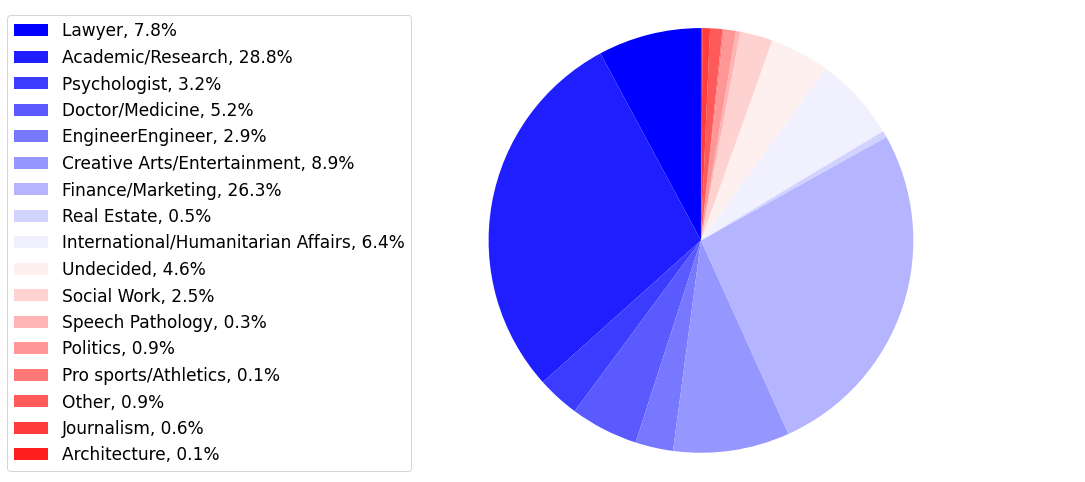

In [23]:
carrer_frequency = []

for i in range(1, 18):
    carrer_frequency.append(len(df[df['career_c'] == i]))
    
labels = ['Lawyer', 'Academic/Research', 'Psychologist', 'Doctor/Medicine', 'EngineerEngineer', 'Creative Arts/Entertainment',
          'Finance/Marketing', 'Real Estate', 'International/Humanitarian Affairs', 'Undecided', 'Social Work', 'Speech Pathology',
          'Politics', 'Pro sports/Athletics', 'Other', 'Journalism', 'Architecture']

advanced_pie_chart(carrer_frequency, labels, (15, 6.5))

### How often participatns go out, date

#### How often participatns go out

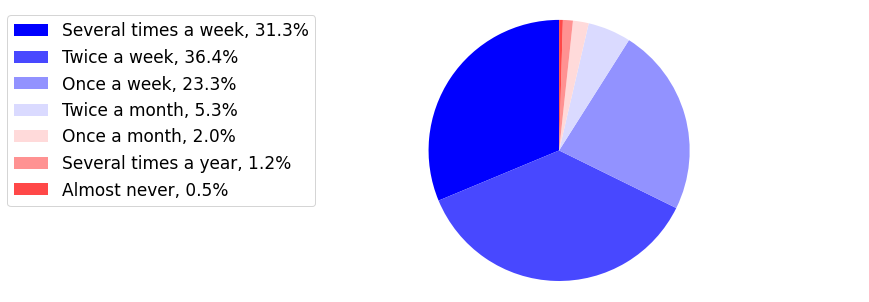

In [24]:
labels = ['Several times a week', 'Twice a week', 'Once a week', 'Twice a month', 'Once a month', 'Several times a year',
          'Almost never']
go_out_frequency = []

for i in range(1, 8):
    go_out_frequency.append(len(df[df['go_out'] == i]))
    
advanced_pie_chart(go_out_frequency, labels, (12, 4))

#### How often participatns date

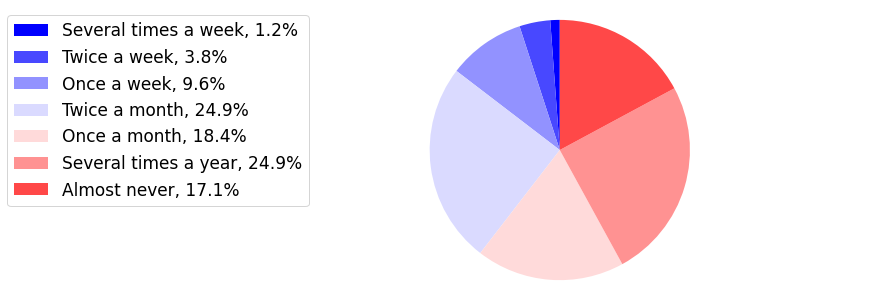

In [25]:
date_frequency = []

for i in range(1, 8):
    date_frequency.append(len(df[df['date'] == i]))

advanced_pie_chart(date_frequency, labels, (12, 4))

In [26]:
matched_df['date_diff'] = abs(matched_df['date'] - matched_df['date_partners'])
matched_df['go_out_diff'] = abs(matched_df['go_out'] - matched_df['go_out_partners'])

array([[<AxesSubplot:title={'center':'date_diff'}>,
        <AxesSubplot:title={'center':'go_out_diff'}>]], dtype=object)

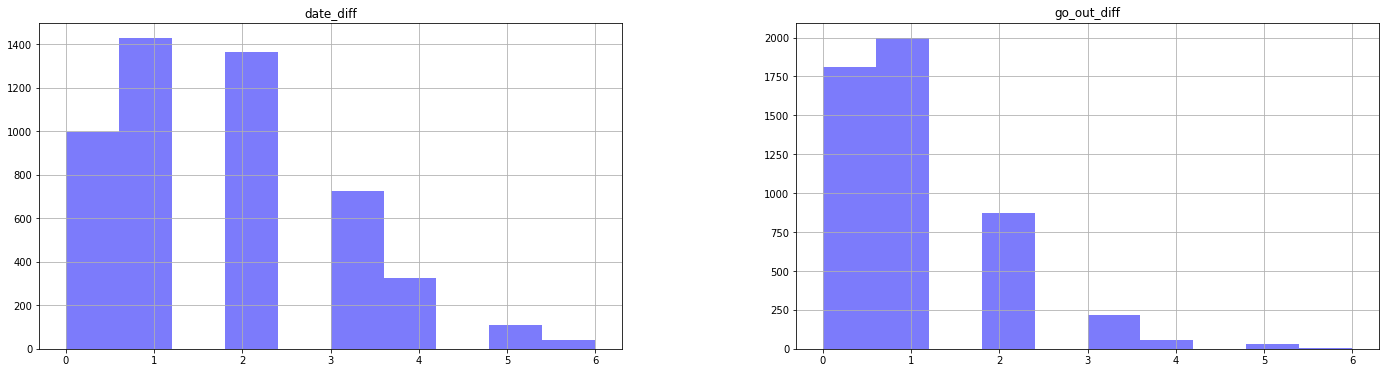

In [27]:
matched_df[[
    'date_diff', 'go_out_diff'
]].hist(figsize=(24, 6), color = purple)

### How many times partners has participant contacted to set up a date since the speed dating 

array([[<AxesSubplot:title={'center':'you_call'}>]], dtype=object)

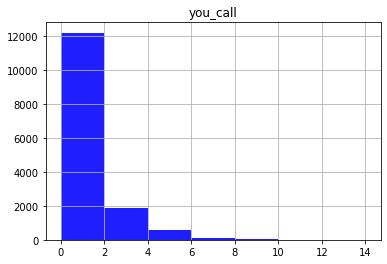

In [28]:
df[[
    'you_call'
]].hist(figsize = (6, 4), bins=[0, 2, 4, 6, 8, 10, 12, 14], color = blue)

### How many partners have contacted the participant

array([[<AxesSubplot:title={'center':'them_cal'}>]], dtype=object)

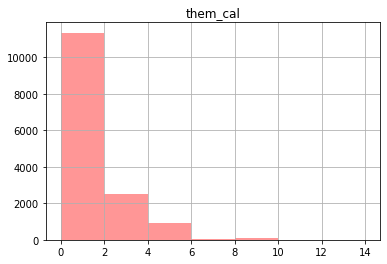

In [29]:
df[[
    'them_cal'
]].hist(figsize = (6, 4), bins=[0, 2, 4, 6, 8, 10, 12, 14], color = salmon)

### Do participants which go out more contact partners to set up a date more?

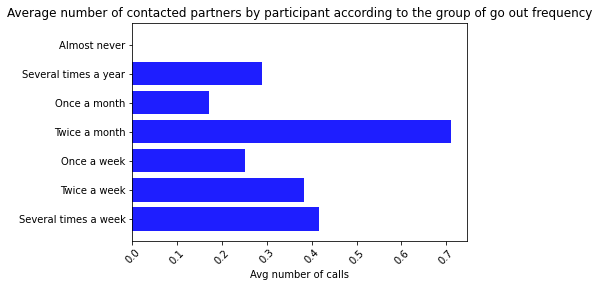

In [30]:
labels = ['Several times a week', 'Twice a week', 'Once a week', 'Twice a month', 'Once a month', 'Several times a year',
          'Almost never']
avg_calls = []

for i in range(1, 8):
    tmp_df = df[df['go_out'] == i]
    # Append avg number of calls for the group
    avg_calls.append(tmp_df['you_call'].sum()/len(tmp_df))
    
plt.barh(labels, avg_calls, color = blue)
plt.title('Average number of contacted partners by participant according to the group of go out frequency')
plt.xlabel('Avg number of calls')
plt.xticks(rotation = 45)
plt.show()

### Do participants which date more contact partners to set up a date more?

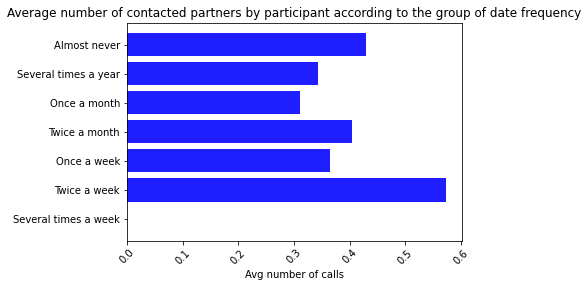

In [31]:
labels = ['Several times a week', 'Twice a week', 'Once a week', 'Twice a month', 'Once a month', 'Several times a year',
          'Almost never']
avg_calls = []

for i in range(1, 8):
    tmp_df = df[df['date'] == i]
    # Append avg number of calls for the group
    avg_calls.append(tmp_df['you_call'].sum()/len(tmp_df))
    
plt.barh(labels, avg_calls, color = blue)
plt.title('Average number of contacted partners by participant according to the group of date frequency')
plt.xlabel('Avg number of calls')
plt.xticks(rotation = 45)
plt.show()

### Do participants of some career group call more to set up a date?

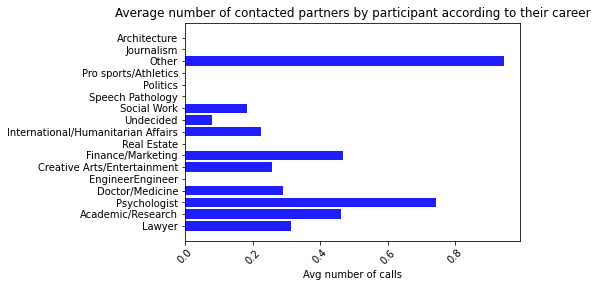

In [32]:
labels = ['Lawyer', 'Academic/Research', 'Psychologist', 'Doctor/Medicine', 'EngineerEngineer', 'Creative Arts/Entertainment',
          'Finance/Marketing', 'Real Estate', 'International/Humanitarian Affairs', 'Undecided', 'Social Work', 'Speech Pathology',
          'Politics', 'Pro sports/Athletics', 'Other', 'Journalism', 'Architecture']
avg_calls = []

for i in range(1, 18):
    tmp_df = df[df['career_c'] == i]
    # Append avg number of calls for the group
    avg_calls.append(tmp_df['you_call'].sum()/len(tmp_df))
    
plt.barh(labels, avg_calls, color = blue)
plt.title('Average number of contacted partners by participant according to their career')
plt.xlabel('Avg number of calls')
plt.xticks(rotation = 45)
plt.show()

### Have more attractive participant received more calls?

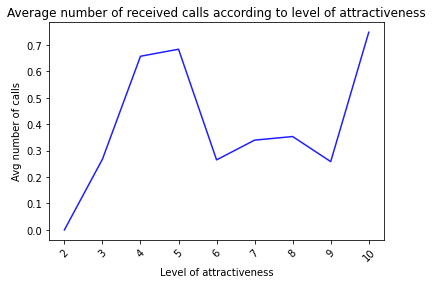

In [33]:
labels = list(range(1, 11, 1))
avg_calls = []

for i in range(1, 11):
    tmp_df = df[df['attr_me'] == i]
    # Append avg number of calls for the group
    avg_calls.append(tmp_df['you_call'].sum()/len(tmp_df))
    
plt.plot(labels, avg_calls, color = blue)
plt.title('Average number of received calls according to level of attractiveness')
plt.xlabel('Level of attractiveness')
plt.ylabel('Avg number of calls')
plt.xticks(rotation = 45)
plt.show()

In [34]:
labels = list(range(1, 11, 1))
labels

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

### How participants measure up themselves and what are their preferences
Participant measured up themselves and preferrences on their partner. They rated importance of following 6 attributes:
 - attr - attractive
 - sinc - sincere
 - fun - funny
 - intel - intelligent
 - amb - ambitious
 - shar - having shared interests/hobbies

#### Participant measured up themself
On a scale of 1-10 (1= awful and 10=great).  

array([[<AxesSubplot:title={'center':'attr_me'}>,
        <AxesSubplot:title={'center':'sinc_me'}>],
       [<AxesSubplot:title={'center':'fun_me'}>,
        <AxesSubplot:title={'center':'intel_me'}>],
       [<AxesSubplot:title={'center':'amb_me'}>, <AxesSubplot:>]],
      dtype=object)

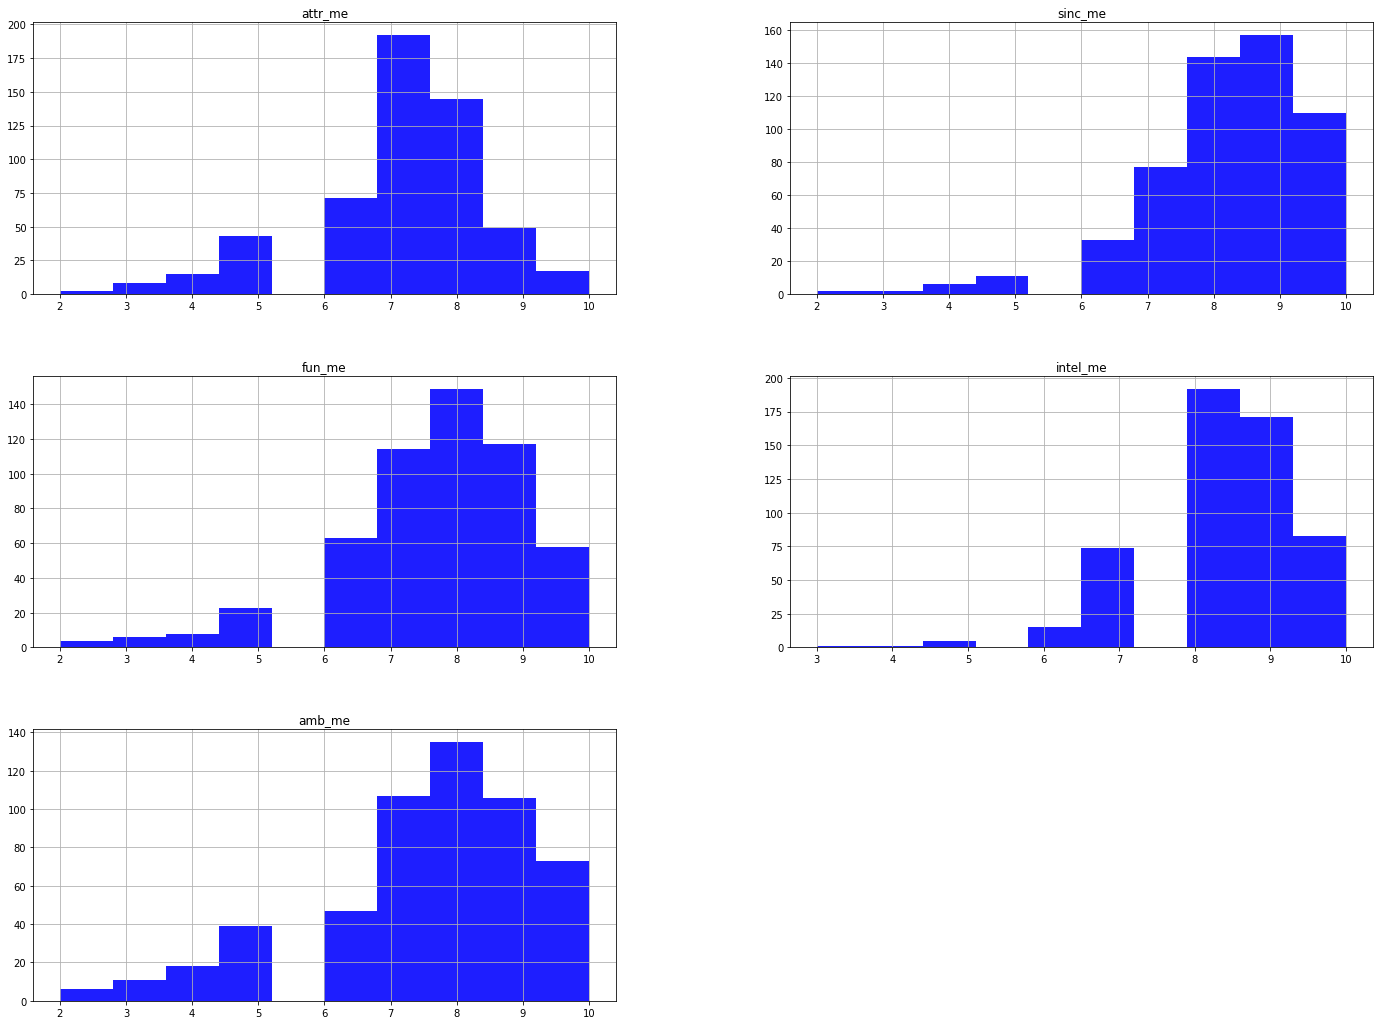

In [35]:
attributes_me_df = df[['iid',
    'attr_me','sinc_me','fun_me','intel_me','amb_me'
]].drop_duplicates()

attributes_me_df.drop(columns = ['iid']).hist(figsize = (24, 18), color = blue)

#### Participant rated how are basic partner's attributes important to them
On a scale of 1-10 (1=not at all important, 10=extremely important)

array([[<AxesSubplot:title={'center':'attr_pref'}>,
        <AxesSubplot:title={'center':'sinc_pref'}>],
       [<AxesSubplot:title={'center':'fun_pref'}>,
        <AxesSubplot:title={'center':'intel_pref'}>],
       [<AxesSubplot:title={'center':'amb_pref'}>,
        <AxesSubplot:title={'center':'shar_pref'}>]], dtype=object)

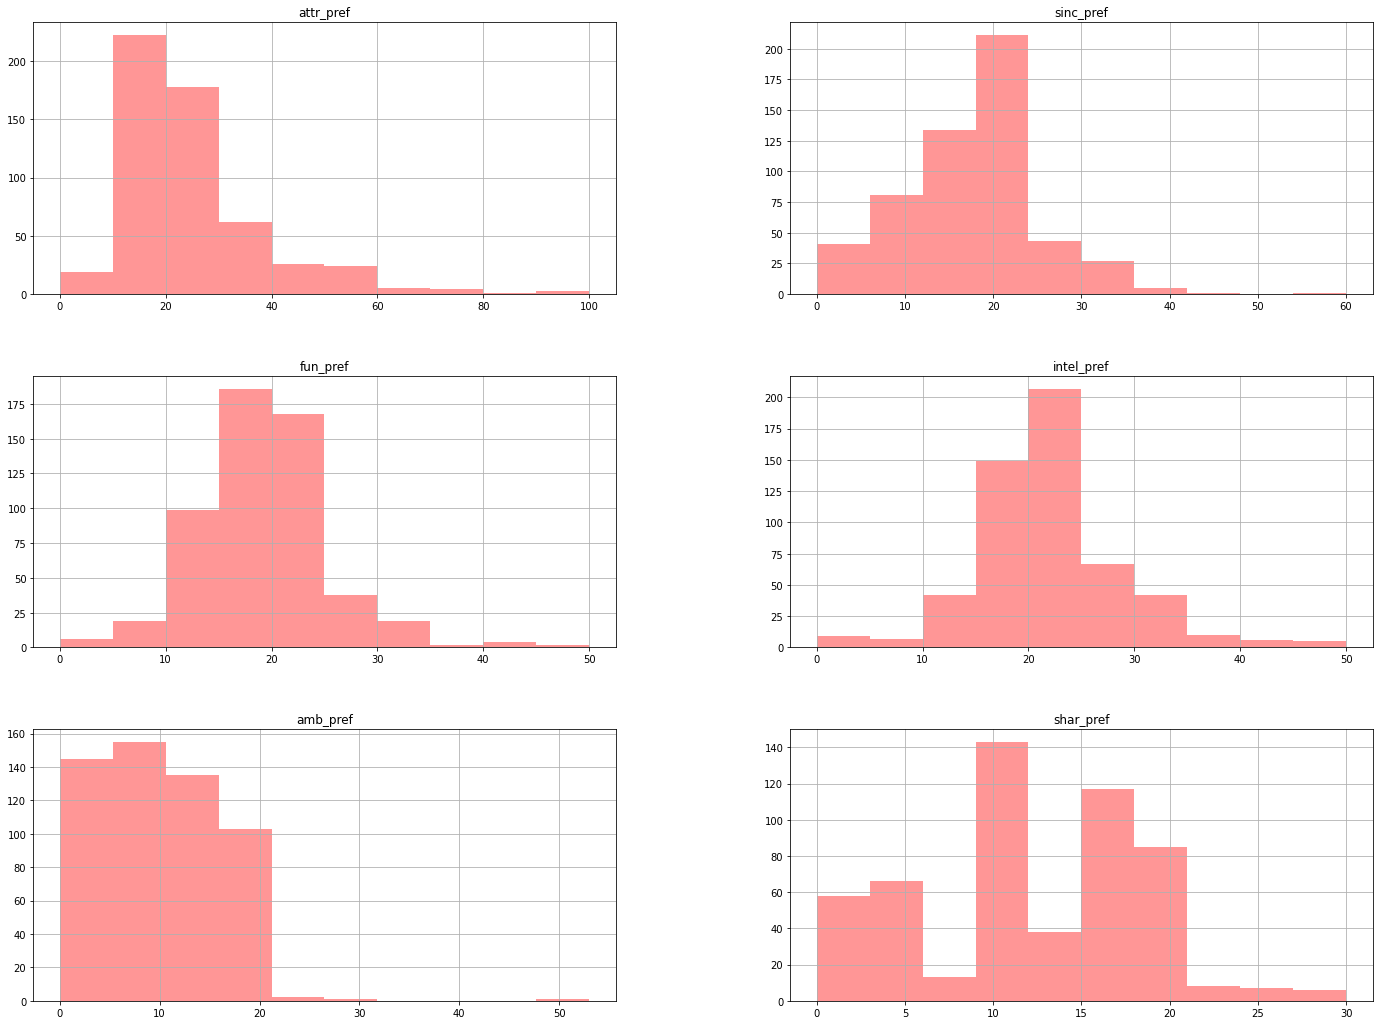

In [36]:
attributes_pref_df = df[[ 'iid',
    'attr_pref','sinc_pref','fun_pref','intel_pref','amb_pref','shar_pref'
]].drop_duplicates()

attributes_pref_df.drop(columns = ['iid']).hist(figsize = (24, 18), color = salmon)

## Comparision features

### How big is the difference between participant's attributes and their preferences to partner?
On a scale of 0-9 (0=no difference, 9=extreme difference)

In [37]:
df['attr_me_my_partner_diff'] = df['attr_me'] - df['attr_me_partners']
df['sinc_me_my_partner_diff'] = df['sinc_me'] - df['sinc_me_partners']
df['fun_me_my_partner_diff'] = df['fun_me'] - df['fun_me_partners']
df['intel_me_my_partner_diff'] = df['intel_me'] - df['intel_me_partners']
df['amb_me_my_partner_diff'] = df['amb_me'] - df['amb_me_partners']

array([[<AxesSubplot:title={'center':'attr_me_my_partner_diff'}>,
        <AxesSubplot:title={'center':'sinc_me_my_partner_diff'}>],
       [<AxesSubplot:title={'center':'fun_me_my_partner_diff'}>,
        <AxesSubplot:title={'center':'intel_me_my_partner_diff'}>],
       [<AxesSubplot:title={'center':'amb_me_my_partner_diff'}>,
        <AxesSubplot:>]], dtype=object)

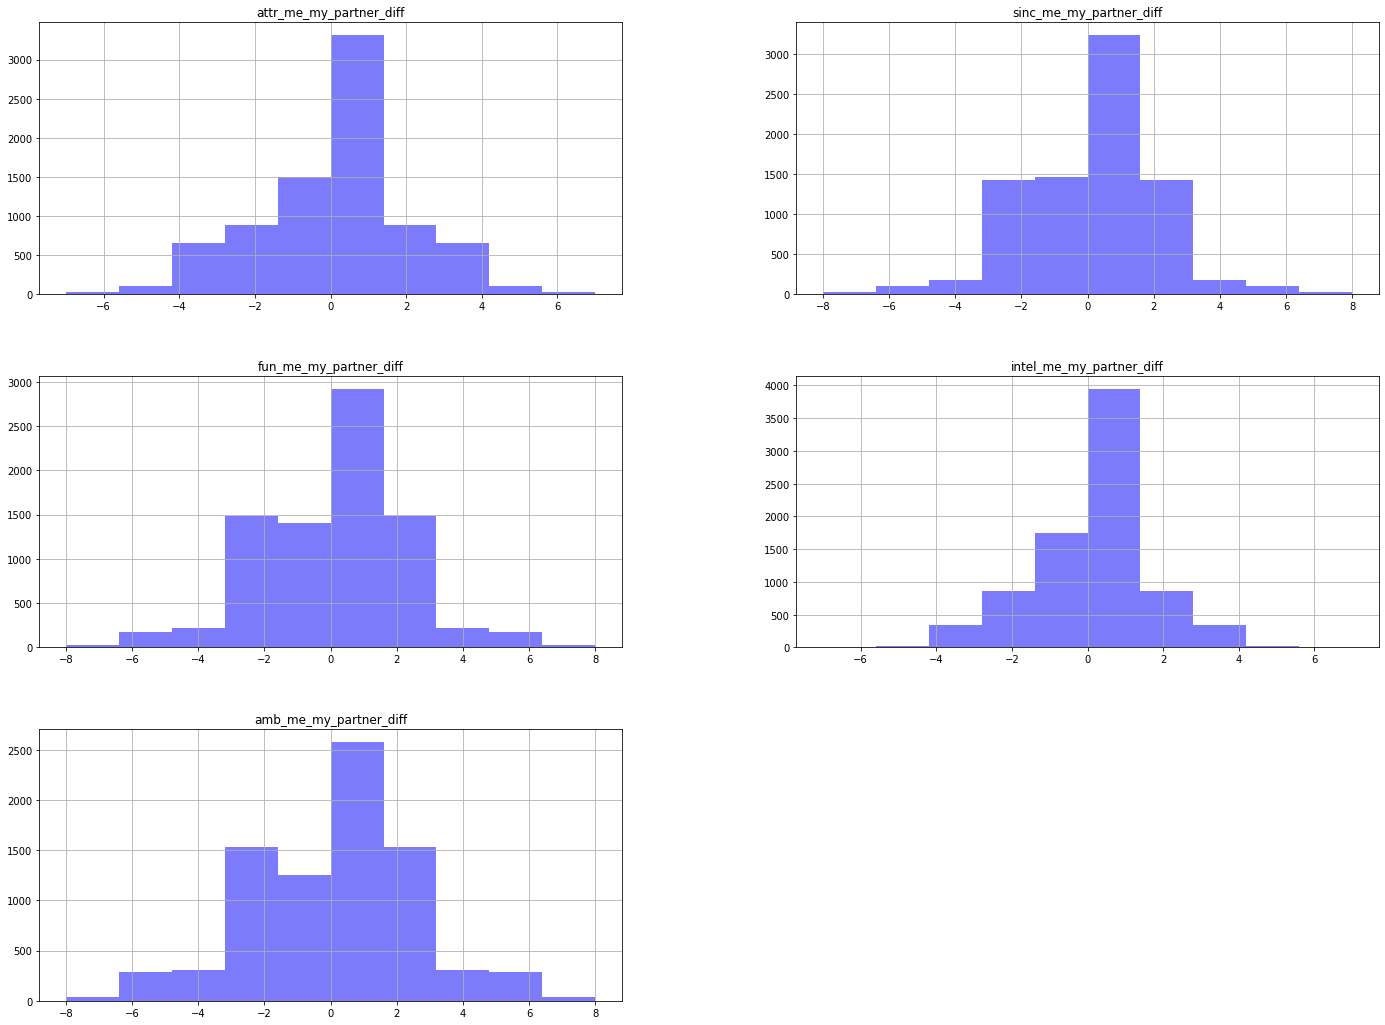

In [38]:
comparision_df = df[['iid','pid',
    'attr_me_my_partner_diff','sinc_me_my_partner_diff','fun_me_my_partner_diff','intel_me_my_partner_diff',
    'amb_me_my_partner_diff'
]].drop_duplicates()

comparision_df[[
    'attr_me_my_partner_diff','sinc_me_my_partner_diff','fun_me_my_partner_diff','intel_me_my_partner_diff',
    'amb_me_my_partner_diff'
]].hist(figsize=(24,18), color = purple)

### How big is the difference between participant's attributes and their matched partner attributes? (Both measured up themselves)
On a scale of 0-9 (0=no difference, 9=extreme difference)

array([[<AxesSubplot:title={'center':'attr_me_my_partner_diff'}>,
        <AxesSubplot:title={'center':'sinc_me_my_partner_diff'}>],
       [<AxesSubplot:title={'center':'fun_me_my_partner_diff'}>,
        <AxesSubplot:title={'center':'intel_me_my_partner_diff'}>],
       [<AxesSubplot:title={'center':'amb_me_my_partner_diff'}>,
        <AxesSubplot:>]], dtype=object)

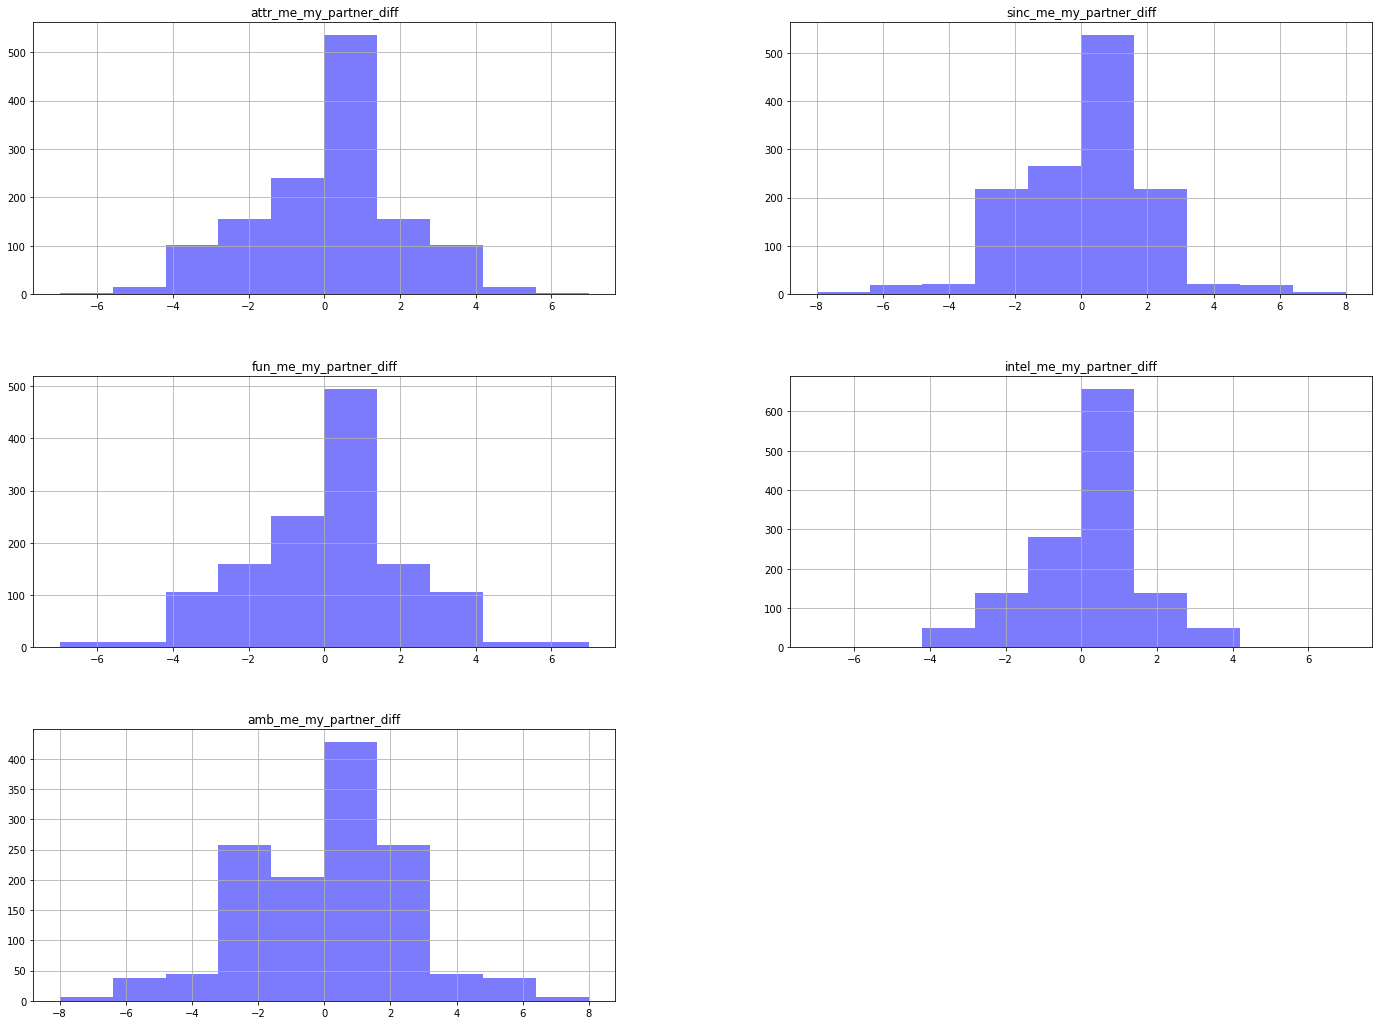

In [39]:
df_temp = df[df['match']==1]

comparision_df = df_temp[['iid','pid',
    'attr_me_my_partner_diff','sinc_me_my_partner_diff','fun_me_my_partner_diff','intel_me_my_partner_diff',
    'amb_me_my_partner_diff'
]].drop_duplicates()

comparision_df[[
    'attr_me_my_partner_diff','sinc_me_my_partner_diff','fun_me_my_partner_diff','intel_me_my_partner_diff',
    'amb_me_my_partner_diff'
]].hist(figsize=(24,18), color = purple)

### How big is the difference between participant's preferences and their matched partner's preferences?
On a scale of 0-9 (0=no difference, 9=extreme difference)

In [40]:
df['attr_me_pref_my_partner_pref_diff'] = df['attr_pref'] - df['attr_pref_partners']
df['sinc_me_pref_my_partner_pref_diff'] = df['sinc_pref'] - df['sinc_pref_partners']
df['fun_me_pref_my_partner_pref_diff'] = df['fun_pref'] - df['fun_pref_partners']
df['intel_me_pref_my_partner_pref_diff'] = df['intel_pref'] - df['intel_pref_partners']
df['amb_me_pref_my_partner_pref_diff'] = df['amb_pref'] - df['amb_pref_partners']

array([[<AxesSubplot:title={'center':'attr_me_pref_my_partner_pref_diff'}>,
        <AxesSubplot:title={'center':'sinc_me_pref_my_partner_pref_diff'}>],
       [<AxesSubplot:title={'center':'fun_me_pref_my_partner_pref_diff'}>,
        <AxesSubplot:title={'center':'intel_me_pref_my_partner_pref_diff'}>],
       [<AxesSubplot:title={'center':'amb_me_pref_my_partner_pref_diff'}>,
        <AxesSubplot:>]], dtype=object)

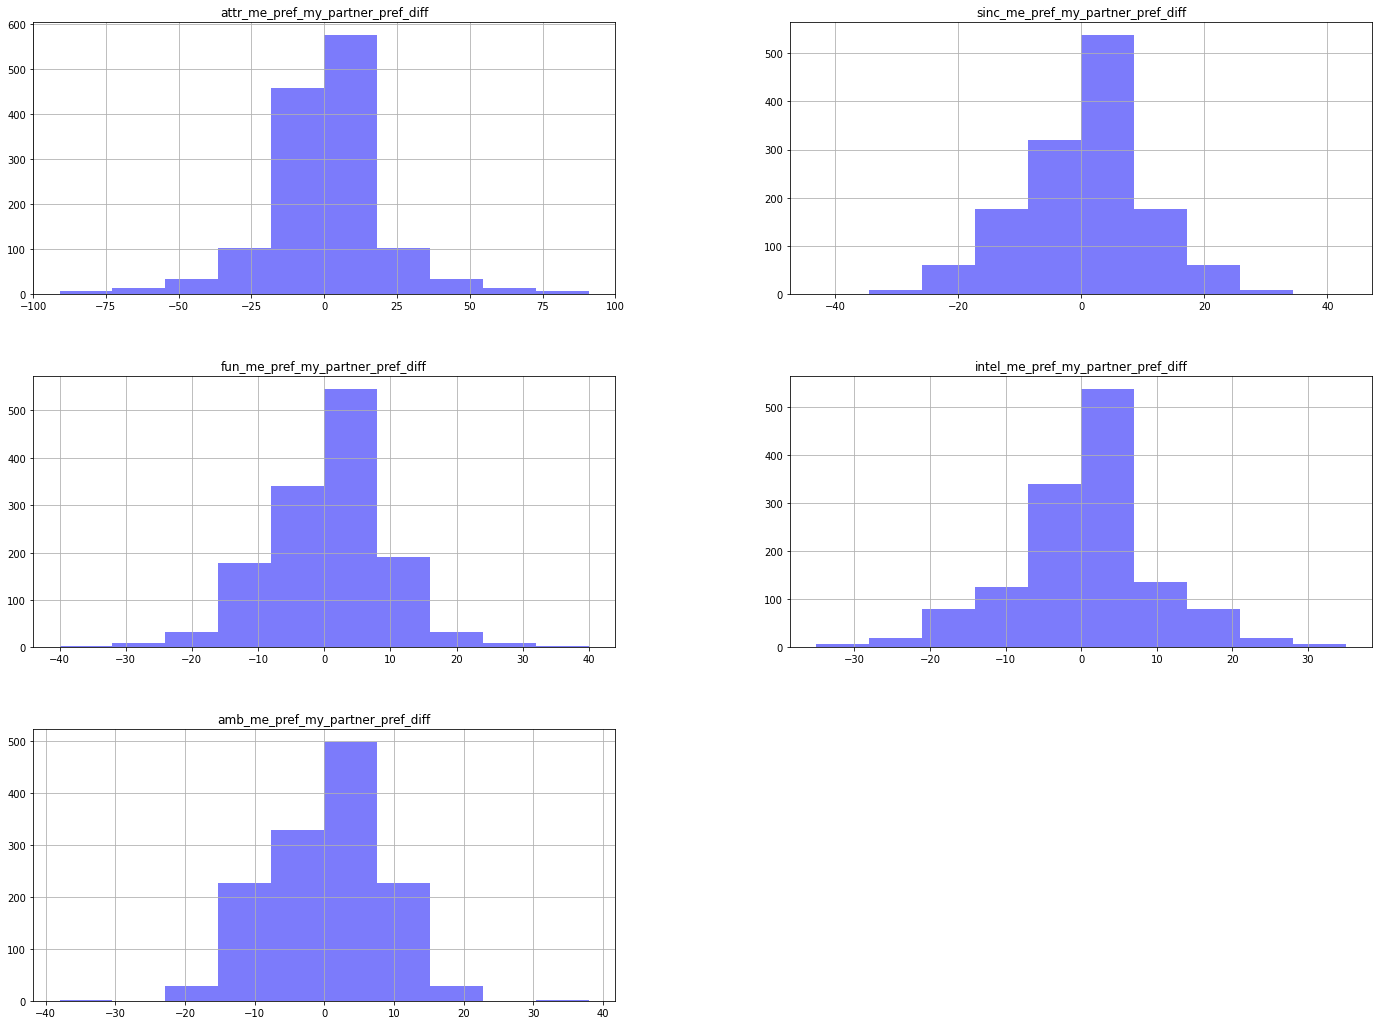

In [41]:
df_temp = df[df['match']==1]

comparision_df = df_temp[['iid','pid',
    'attr_me_pref_my_partner_pref_diff','sinc_me_pref_my_partner_pref_diff','fun_me_pref_my_partner_pref_diff',
    'intel_me_pref_my_partner_pref_diff','amb_me_pref_my_partner_pref_diff'
]].drop_duplicates()

comparision_df[[
    'attr_me_pref_my_partner_pref_diff','sinc_me_pref_my_partner_pref_diff','fun_me_pref_my_partner_pref_diff',
    'intel_me_pref_my_partner_pref_diff','amb_me_pref_my_partner_pref_diff'
]].hist(figsize=(24,18), color = purple)

## Hobbies

### How important are hobbies to participants?
On a scale of 1-10 (1=not at all important, 10=extremely important)

array([[<AxesSubplot:title={'center':'sports'}>,
        <AxesSubplot:title={'center':'tvsports'}>],
       [<AxesSubplot:title={'center':'exercise'}>,
        <AxesSubplot:title={'center':'dining'}>],
       [<AxesSubplot:title={'center':'museums'}>,
        <AxesSubplot:title={'center':'art'}>],
       [<AxesSubplot:title={'center':'hiking'}>,
        <AxesSubplot:title={'center':'gaming'}>],
       [<AxesSubplot:title={'center':'clubbing'}>,
        <AxesSubplot:title={'center':'reading'}>],
       [<AxesSubplot:title={'center':'tv'}>,
        <AxesSubplot:title={'center':'theater'}>],
       [<AxesSubplot:title={'center':'movies'}>,
        <AxesSubplot:title={'center':'concerts'}>],
       [<AxesSubplot:title={'center':'music'}>,
        <AxesSubplot:title={'center':'shopping'}>],
       [<AxesSubplot:title={'center':'yoga'}>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>]], dtype=object)

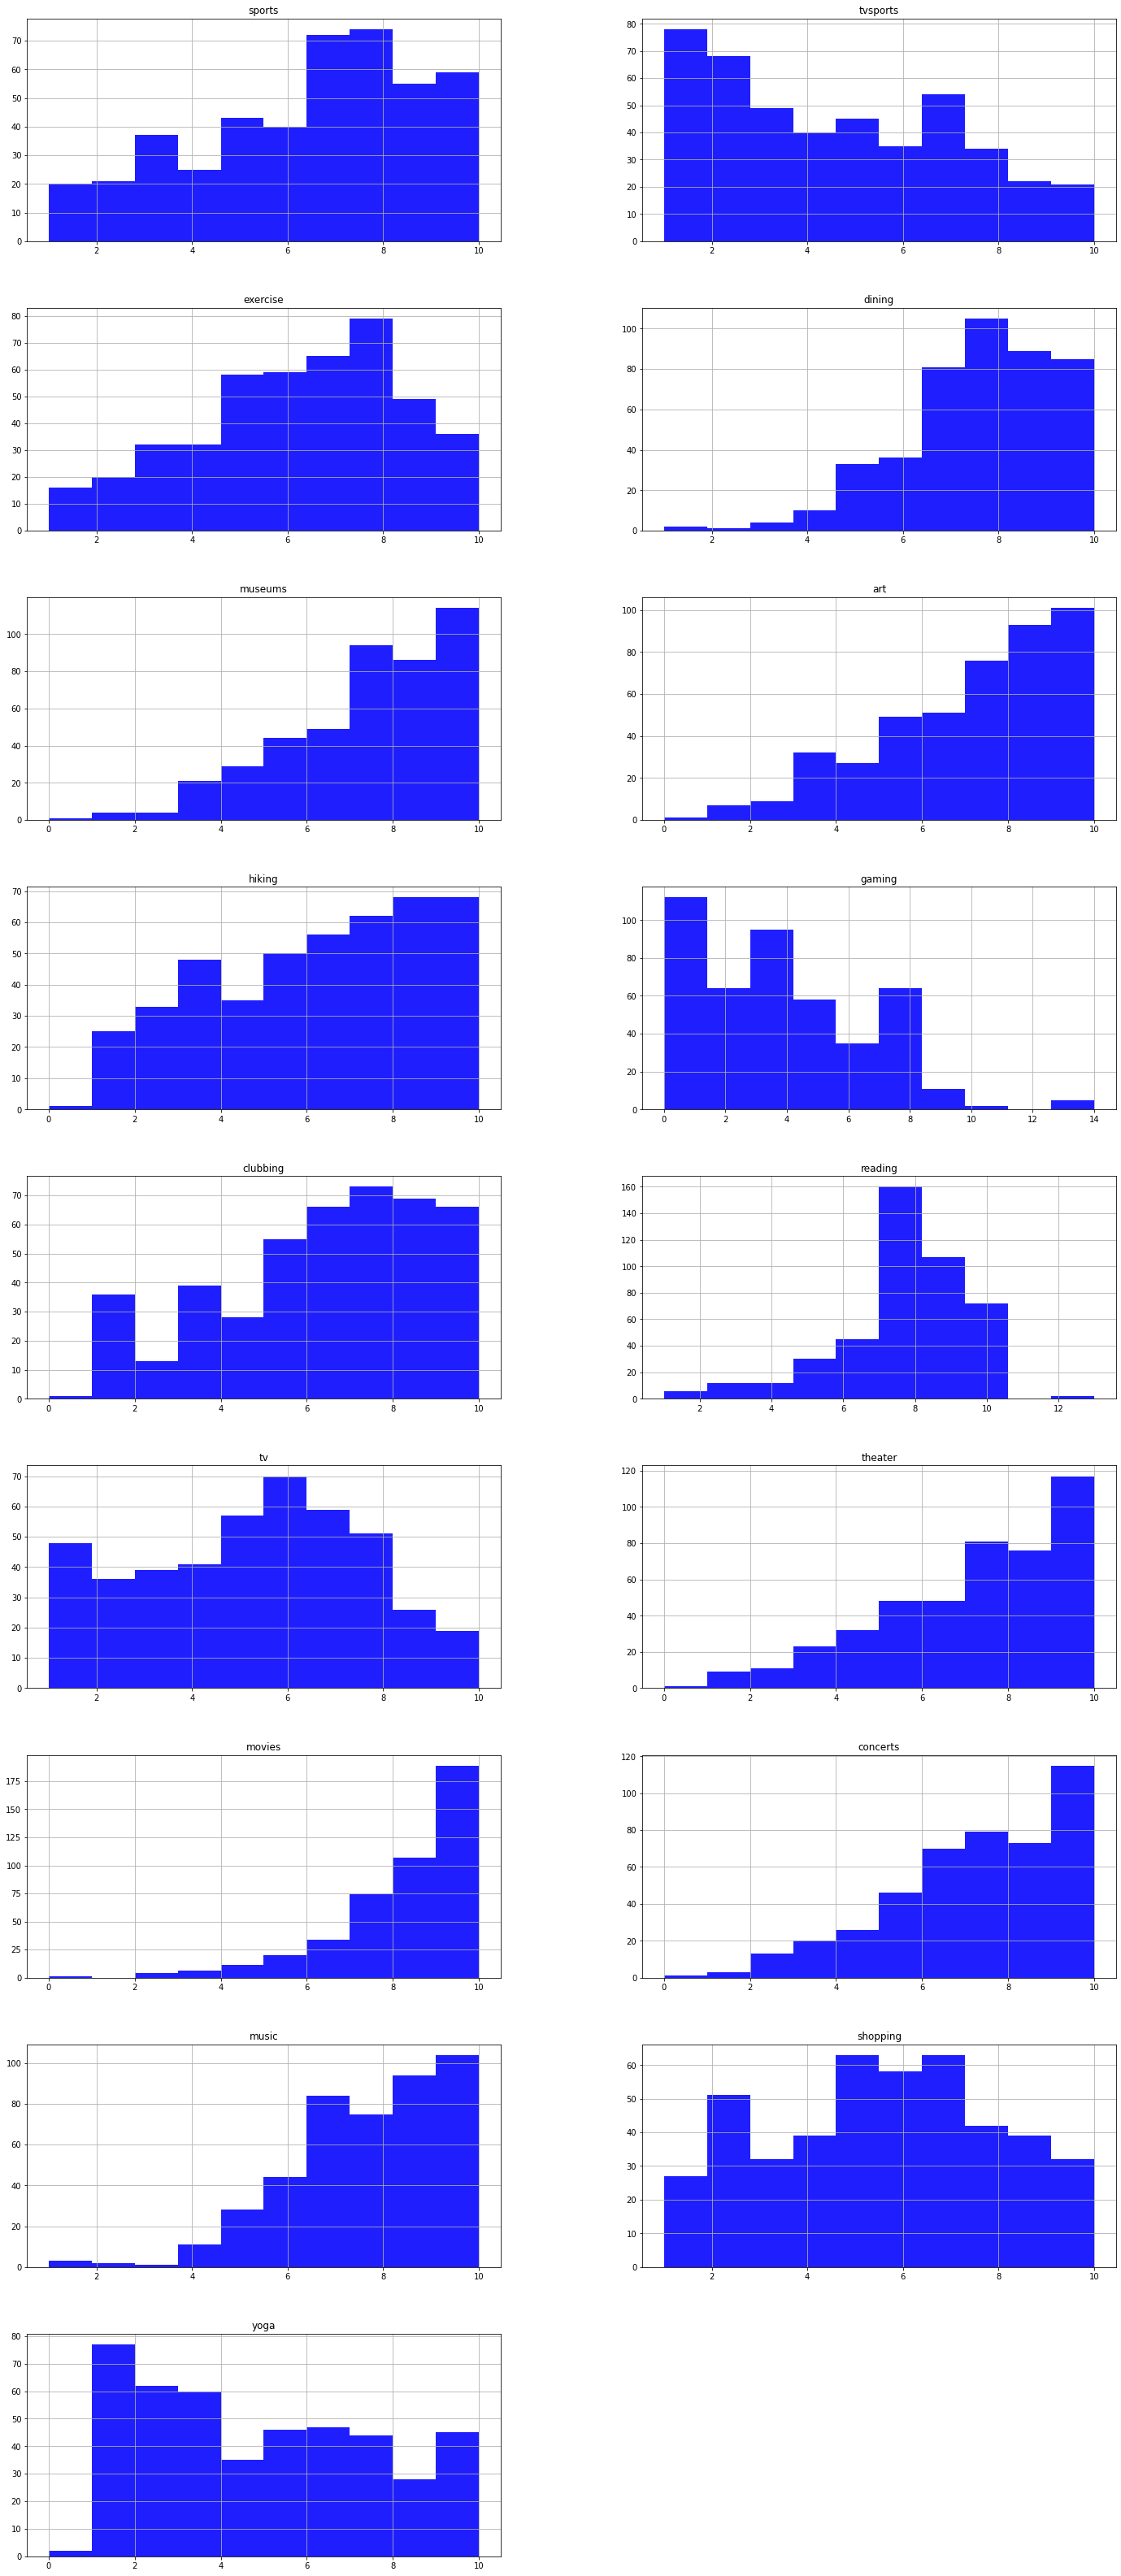

In [42]:
comparision_df = df_temp[['iid',
    'sports','tvsports','exercise','dining','museums','art','hiking','gaming',
    'clubbing','reading','tv','theater', 'movies','concerts','music','shopping','yoga',
]].drop_duplicates()

comparision_df[[
    'sports','tvsports','exercise','dining','museums','art','hiking','gaming',
    'clubbing','reading','tv','theater', 'movies','concerts','music','shopping','yoga',
]].hist(figsize=(24,64), layout=(10,2), color = blue)

### How big is the difference between participant's importance of hobbies and their matched partner importance of hobbies?
On a scale of 0-9 (0=no difference, 9=extreme difference)

In [43]:
df['sports_me_my_partner_diff'] = abs(df['sports'] - df['sports_partners'])
df['tvsports_me_my_partner_diff'] = abs(df['tvsports'] - df['tvsports_partners'])
df['exercise_me_my_partner_diff'] = abs(df['exercise'] - df['exercise_partners'])
df['dining_me_my_partner_diff'] = abs(df['dining'] - df['dining_partners'])
df['museums_me_my_partner_diff'] = abs(df['museums'] - df['museums_partners'])
df['art_me_my_partner_diff'] = abs(df['art'] - df['art_partners'])
df['hiking_me_my_partner_diff'] = abs(df['hiking'] - df['hiking_partners'])
df['gaming_me_my_partner_diff'] = abs(df['gaming'] - df['gaming_partners'])
df['clubbing_me_my_partner_diff'] = abs(df['clubbing'] - df['clubbing_partners'])
df['reading_me_my_partner_diff'] = abs(df['reading'] - df['reading_partners'])
df['tv_me_my_partner_diff'] = abs(df['tv'] - df['tv_partners'])
df['theater_me_my_partner_diff'] = abs(df['theater'] - df['theater_partners'])
df['movies_me_my_partner_diff'] = abs(df['movies'] - df['movies_partners'])
df['concerts_me_my_partner_diff'] = abs(df['concerts'] - df['concerts_partners'])
df['music_me_my_partner_diff'] = abs(df['music'] - df['music_partners'])
df['shopping_me_my_partner_diff'] = abs(df['shopping'] - df['shopping_partners'])
df['yoga_me_my_partner_diff'] = abs(df['yoga'] - df['yoga_partners'])

array([[<AxesSubplot:title={'center':'sports_me_my_partner_diff'}>,
        <AxesSubplot:title={'center':'tvsports_me_my_partner_diff'}>],
       [<AxesSubplot:title={'center':'exercise_me_my_partner_diff'}>,
        <AxesSubplot:title={'center':'dining_me_my_partner_diff'}>],
       [<AxesSubplot:title={'center':'museums_me_my_partner_diff'}>,
        <AxesSubplot:title={'center':'art_me_my_partner_diff'}>],
       [<AxesSubplot:title={'center':'hiking_me_my_partner_diff'}>,
        <AxesSubplot:title={'center':'gaming_me_my_partner_diff'}>],
       [<AxesSubplot:title={'center':'clubbing_me_my_partner_diff'}>,
        <AxesSubplot:title={'center':'reading_me_my_partner_diff'}>],
       [<AxesSubplot:title={'center':'tv_me_my_partner_diff'}>,
        <AxesSubplot:title={'center':'theater_me_my_partner_diff'}>],
       [<AxesSubplot:title={'center':'movies_me_my_partner_diff'}>,
        <AxesSubplot:title={'center':'concerts_me_my_partner_diff'}>],
       [<AxesSubplot:title={'center':

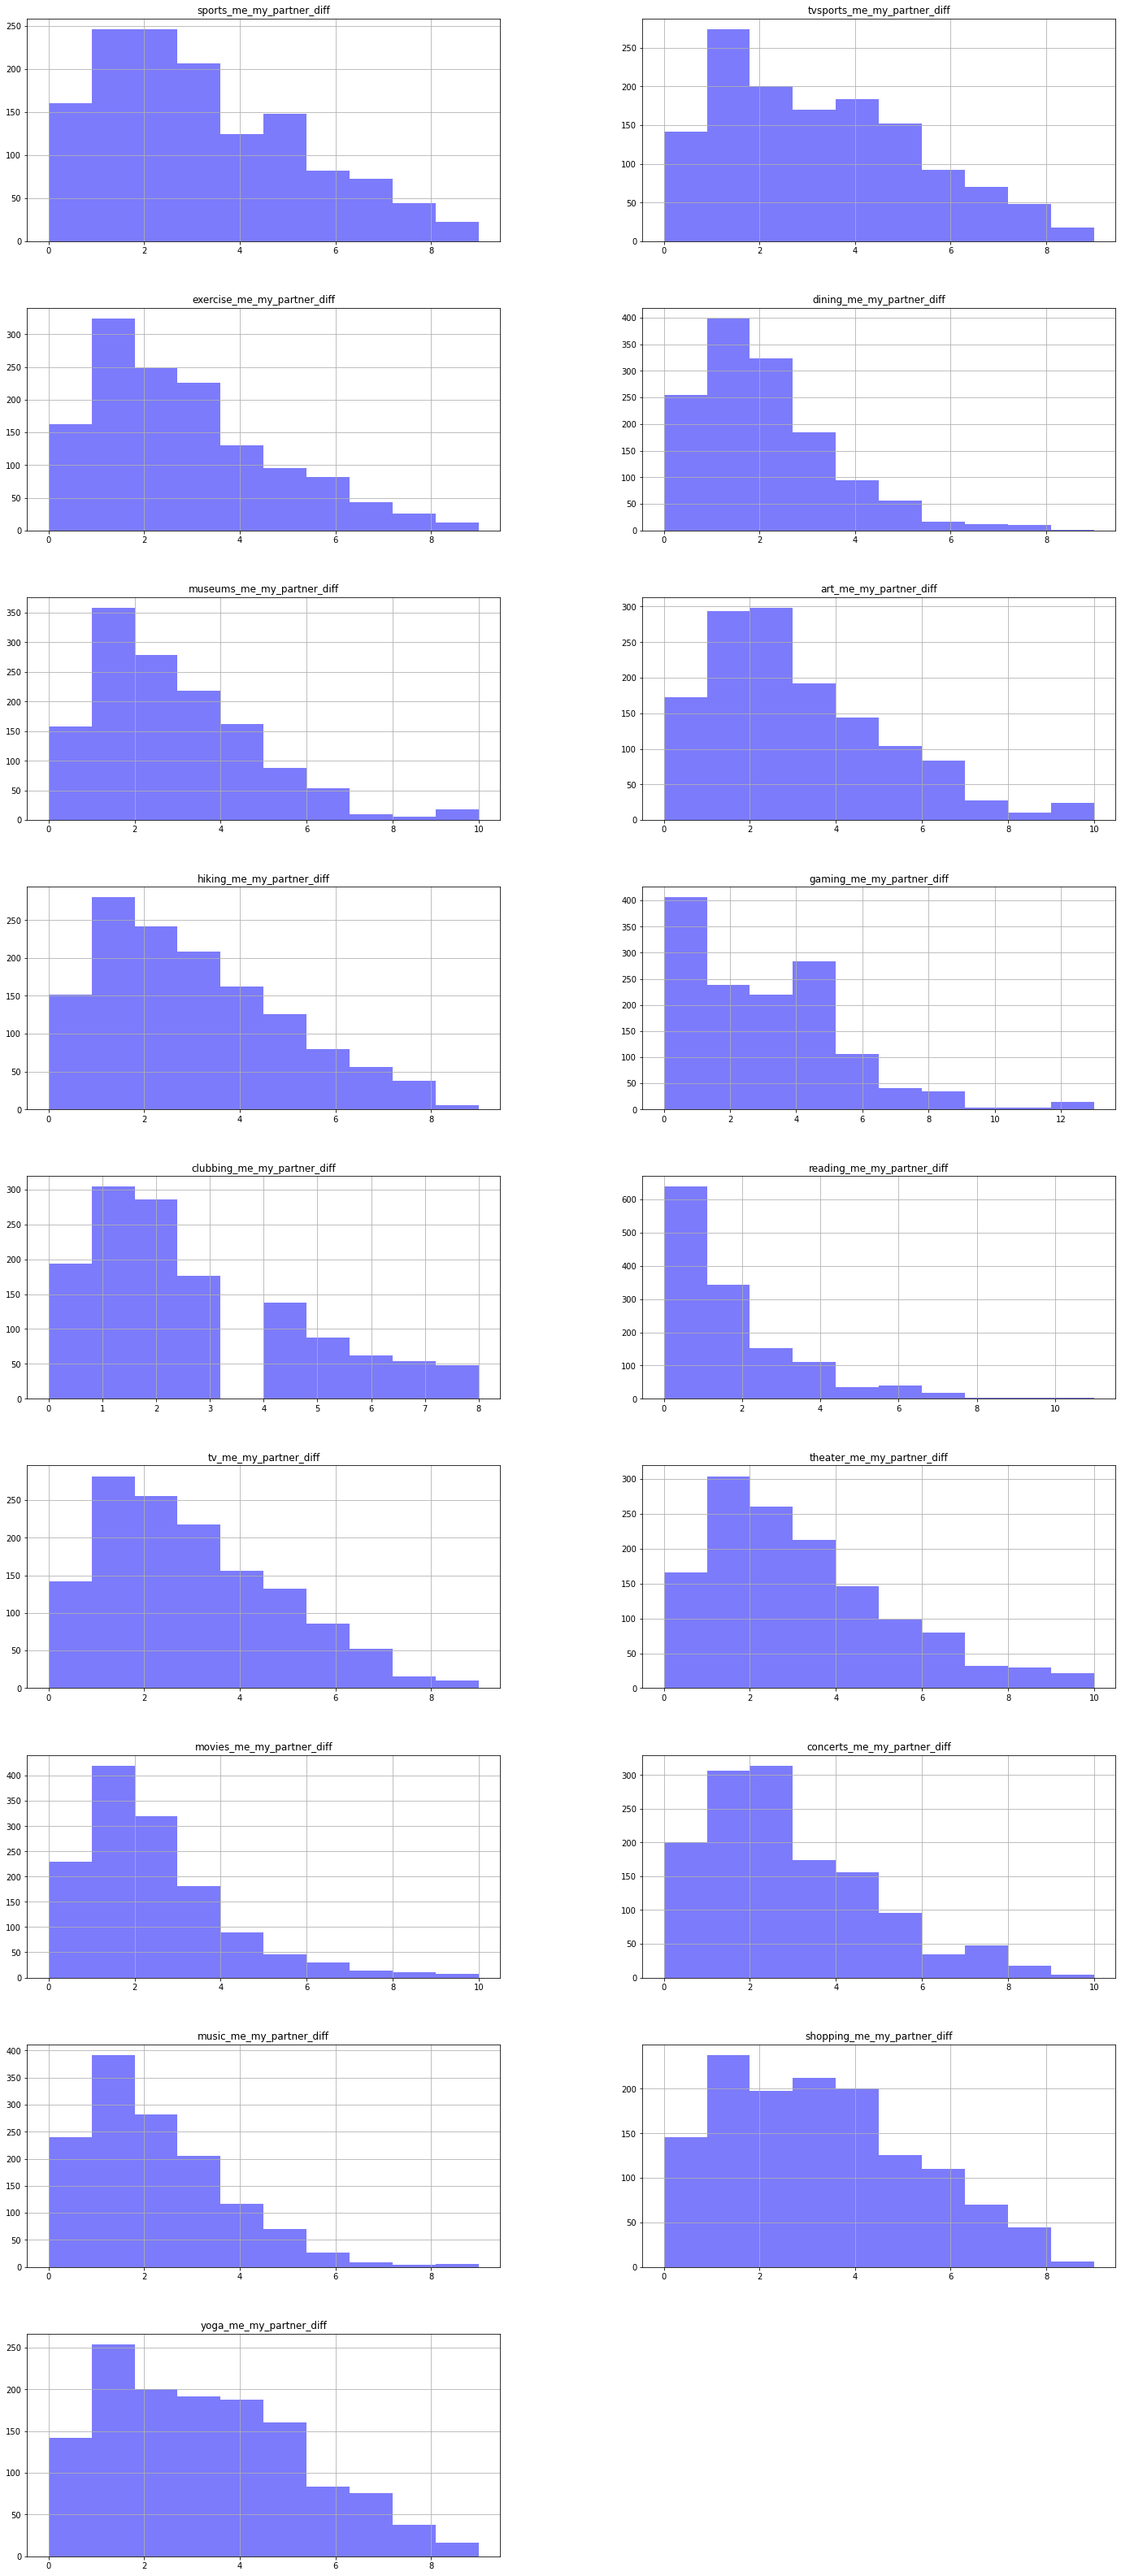

In [44]:
df_temp = df[df['match']==1]

comparision_df = df_temp[['iid','pid',
    'sports_me_my_partner_diff',
    'tvsports_me_my_partner_diff',
    'exercise_me_my_partner_diff',
    'dining_me_my_partner_diff',
    'museums_me_my_partner_diff',
    'art_me_my_partner_diff',
    'hiking_me_my_partner_diff',
    'gaming_me_my_partner_diff',
    'clubbing_me_my_partner_diff',
    'reading_me_my_partner_diff',
    'tv_me_my_partner_diff',
    'theater_me_my_partner_diff',
    'movies_me_my_partner_diff',
    'concerts_me_my_partner_diff',
    'music_me_my_partner_diff',
    'shopping_me_my_partner_diff',
    'yoga_me_my_partner_diff',
]].drop_duplicates()

comparision_df[[
    'sports_me_my_partner_diff',
    'tvsports_me_my_partner_diff',
    'exercise_me_my_partner_diff',
    'dining_me_my_partner_diff',
    'museums_me_my_partner_diff',
    'art_me_my_partner_diff',
    'hiking_me_my_partner_diff',
    'gaming_me_my_partner_diff',
    'clubbing_me_my_partner_diff',
    'reading_me_my_partner_diff',
    'tv_me_my_partner_diff',
    'theater_me_my_partner_diff',
    'movies_me_my_partner_diff',
    'concerts_me_my_partner_diff',
    'music_me_my_partner_diff',
    'shopping_me_my_partner_diff',
    'yoga_me_my_partner_diff',
]].hist(figsize=(24,64), layout=(10,2), color = purple)

##  -------------------------------------------- Poznamky --------------------------------------------

## Este mozno nejaka zakladna analyza profesii ??

### Prosim krot sa

* zakladna analyza profesii
    * kolko je ludi v jednoltivej profesii - mozno spravit nejake zgrupnutie nad zlymi nazvami (lower case, trim)
    * histogram veku
    * matche na rovnaku rasu
* veci okolo income - income difference in matches ???
    * ako casto sa chodi na rande
    * ci you_call je nejaky vyssi u profesii (engineers) ? alebo u ludi ktory chodia castejsie na rande - histogram s vlastnymi bucketmi
    * ci je them call vyssi u ludi ktory maju v priemere vysssiu atraktivitu ?
* porovnavat od kolkych cakali, ze sa im budu pacit a aka bola realita
    
    
    

##  -------------------------------------------- Povodne veci --------------------------------------------

# Uvodne navrhy na hypotezy

    * Ci inzinieri(technicky - technicky nie biomedical) najviac sadaju najviac k medikom - ak nie tak ku komu
    * Klasifikovat match medzi dvoma ludmi - na zaklade svojich preferencii a osobnosti druheho cloveka
    * Ci ludia so zalubou pre sport viac hladaju tiez sportovcov (TImova hypoteza - viac to riesia zeny)
    * Ci ludia beru aj menej inteligentnych partnerov ako su oni sami (intX in survey)



In [45]:
pd.set_option('display.max_rows', 500)
info = pd.DataFrame(data['field'].value_counts())
info = info.reset_index()
info[info['index'].str.contains('enginee')]

,index,field
30,engineering,46
41,electrical engineering,37
75,Biomedical engineering,22
142,biomedical engineering,18


In [46]:
pd.set_option('display.max_rows', 500)
info = pd.DataFrame(data['field'].value_counts())
info = info.reset_index()
info[info['index'].str.contains('edic')]

,index,field
25,medicine,52
32,Biomedical Engineering,44
36,Medicine,40
75,Biomedical engineering,22
79,Biomedical Informatics,22
81,medicine and biochemistry,21
86,medical informatics,21
113,biomedicine,20
142,biomedical engineering,18
207,Art History/medicine,10


In [47]:
pd.set_option('display.max_rows', 500)
info = pd.DataFrame(data['field_cd'].value_counts())
info = info.reset_index()
info

,index,field_cd
0,8.0,1925
1,10.0,993
2,5.0,864
3,13.0,709
4,3.0,696
5,1.0,665
6,9.0,626
7,11.0,468
8,6.0,325
9,7.0,241


In [48]:
pd.set_option('display.max_rows', 500)
info = pd.DataFrame(data['career'].value_counts())
info = info.reset_index()
info[info['index'].str.contains('edic')]

,index,career
36,Medicine,40
56,medicine,25
136,CEO in For Profit Biomedical Organization,20
219,Medical Sciences,15
284,medical examiner or researcher,10


In [49]:
data['num_in_3'].value_counts()

1.0    430
0.0    159
2.0     61
4.0     18
Name: num_in_3, dtype: int64

### 2 hypoteza

Features ktore hovorim JA o sebe - attr3_1

Features ktore su MOJE preferencie - attr1_1

Features ktore hovori ta baba o mne ze som taky - attr_o

Features ktore hovoria o babynych preferenciach - pf_o_atr



In [50]:
uniq_person = data.drop_duplicates(subset=['iid'])


<AxesSubplot:>

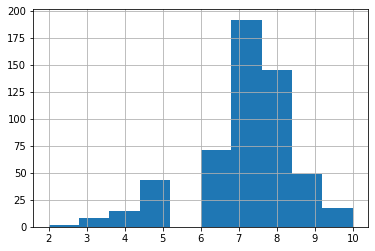

In [51]:
uniq_person['attr3_1'].hist()

<AxesSubplot:>

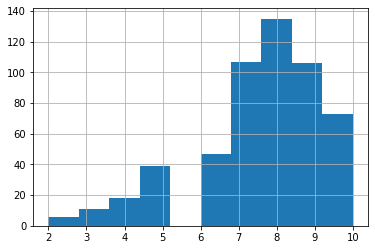

In [52]:
uniq_person['amb3_1'].hist()

<AxesSubplot:>

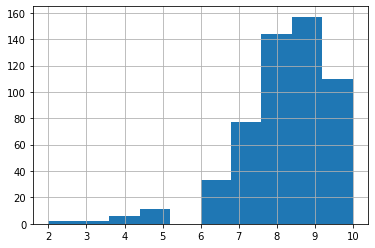

In [53]:
uniq_person['sinc3_1'].hist()

<AxesSubplot:>

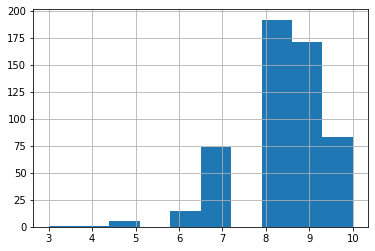

In [54]:
uniq_person['intel3_1'].hist()

<AxesSubplot:>

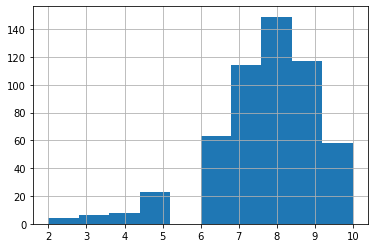

In [55]:
uniq_person['fun3_1'].hist()

<AxesSubplot:>

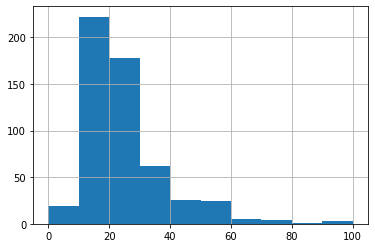

In [56]:
uniq_person['attr1_1'].hist()

<AxesSubplot:>

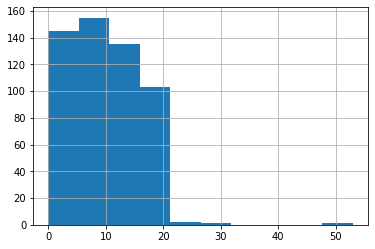

In [57]:
uniq_person['amb1_1'].hist()

<AxesSubplot:>

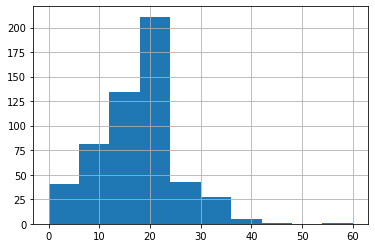

In [58]:
uniq_person['sinc1_1'].hist()

<AxesSubplot:>

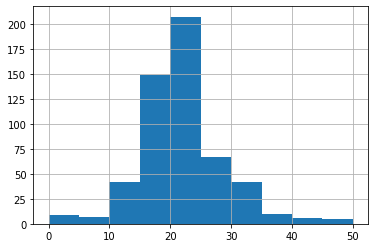

In [59]:
uniq_person['intel1_1'].hist()

<AxesSubplot:>

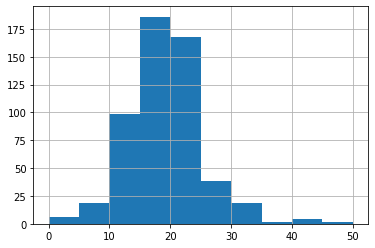

In [60]:
uniq_person['fun1_1'].hist()

##### vlastnosti 2 cloveka su vetsie ako moje ocakavania a zaroven je tam match

In [61]:
my_intel = data[['iid','intel3_1','dec','pid']]


data_persons = data.drop_duplicates(subset=['iid'])
data_intel = data_persons.merge(my_intel,how='inner',left_on='pid',right_on='iid', suffixes=['','_partner'])
data_intel = data_intel[['iid','pid','dec_partner','intel3_1_partner','dec','intel3_1']]

data_intel[(
        data_intel['intel3_1_partner'] >= data_intel['intel3_1']
    ) & ( data_intel['dec'] == 1 )]

,iid,pid,dec_partner,intel3_1_partner,dec,intel3_1
0,1,11.0,0,8.0,1,8.0
1,1,11.0,0,8.0,1,8.0
2,1,11.0,0,8.0,1,8.0
3,1,11.0,0,8.0,1,8.0
4,1,11.0,0,8.0,1,8.0
...,...,...,...,...,...,...
8409,552,509.0,1,8.0,1,7.0
8410,552,509.0,0,8.0,1,7.0
8411,552,509.0,1,8.0,1,7.0
8412,552,509.0,0,8.0,1,7.0


In [62]:
data_intel[data_intel['dec'] == 1]

,iid,pid,dec_partner,intel3_1_partner,dec,intel3_1
0,1,11.0,0,8.0,1,8.0
1,1,11.0,0,8.0,1,8.0
2,1,11.0,0,8.0,1,8.0
3,1,11.0,0,8.0,1,8.0
4,1,11.0,0,8.0,1,8.0
...,...,...,...,...,...,...
8409,552,509.0,1,8.0,1,7.0
8410,552,509.0,0,8.0,1,7.0
8411,552,509.0,1,8.0,1,7.0
8412,552,509.0,0,8.0,1,7.0


##### Iba zeny

In [63]:
my_intel = data[['iid','intel3_1','dec','pid','gender']]
my_intel = my_intel[my_intel['gender'] == 1]


data_persons = data.drop_duplicates(subset=['iid'])
data_intel = data_persons.merge(my_intel,how='inner',left_on='pid',right_on='iid', suffixes=['','_partner'])
data_intel = data_intel[['iid','pid','dec_partner','intel3_1_partner','dec','intel3_1','gender','gender_partner']]

data_intel[(
        data_intel['intel3_1_partner'] >= data_intel['intel3_1']
    ) & ( data_intel['dec'] == 1 )]

,iid,pid,dec_partner,intel3_1_partner,dec,intel3_1,gender,gender_partner
0,1,11.0,0,8.0,1,8.0,0,1
1,1,11.0,0,8.0,1,8.0,0,1
2,1,11.0,0,8.0,1,8.0,0,1
3,1,11.0,0,8.0,1,8.0,0,1
4,1,11.0,0,8.0,1,8.0,0,1
...,...,...,...,...,...,...,...,...
4210,530,531.0,0,10.0,1,9.0,0,1
4211,530,531.0,0,10.0,1,9.0,0,1
4212,530,531.0,0,10.0,1,9.0,0,1
4213,530,531.0,0,10.0,1,9.0,0,1


In [64]:
data_intel[data_intel['dec'] == 1]

,iid,pid,dec_partner,intel3_1_partner,dec,intel3_1,gender,gender_partner
0,1,11.0,0,8.0,1,8.0,0,1
1,1,11.0,0,8.0,1,8.0,0,1
2,1,11.0,0,8.0,1,8.0,0,1
3,1,11.0,0,8.0,1,8.0,0,1
4,1,11.0,0,8.0,1,8.0,0,1
...,...,...,...,...,...,...,...,...
4210,530,531.0,0,10.0,1,9.0,0,1
4211,530,531.0,0,10.0,1,9.0,0,1
4212,530,531.0,0,10.0,1,9.0,0,1
4213,530,531.0,0,10.0,1,9.0,0,1


todo

- pozriet ostatne hypotezy
- dokoncit znenie hypotezy o inteligencii

# NA VYMAZANIE PRED ODOVZDANIM

### Unify personal data rate scale

Every participant have measured up their 6 basic attributes on scale 1-10. They also rated how important are their partner's 6 basic attributes to them. 
Speed dating has been done in 21 waves (sessions). 
In waves 6-9 the scale is 1-10,
in waves 1-5, 10-21 it is 100% devided between these attributes.

There is a need to unify these scales. 
-> Based on waves 6-9 we found out sum of points given for all 6 attributes per participant. We will use average of this value to re-scale data collected in waves 1-5 and 10-21.

In [65]:
# Number of participants in waves 6-9
waves_6_to_9 = df[(df['wave'] > 5) & (df['wave'] < 10)]
len(waves_6_to_9)

5786

In [66]:
preferred_attributes = [x for x in personal_data if x.endswith('pref')]
my_attributes = ['attr_me','sinc_me','fun_me','intel_me','amb_me']

fill_nan_with_zero(df, personal_attributes_columns)

count = 0
for index, row in df.iterrows():
    row_count = 0
    for column in preferred_attributes:
        row_count += row[column]
        count += row[column]
    if row_count < 90:
        print(row['wave'], row_count)
    
count/len(df)

NameError: name 'fill_nan_with_zero' is not defined

#### Fill NaN value in personal data with 0

In [ ]:
def fill_nan_with_zero(df, attributes):
    for attribute in attributes:
        df[attribute] = df[attribute].fillna(0)
        
personal_attributes_columns = ['attr_pref', 'sinc_pref', 'intel_pref', 'fun_pref', 'amb_pref', 'shar_pref', 'attr_me', 'sinc_me', 'intel_me', 'fun_me', 'amb_me']        
fill_nan_with_zero(personal_data, personal_attributes_columns)